# Important Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, Tuple 

# For statistical functions and tests 
# Specifically for the advanced analysis part
from scipy import stats

## Summary Statistcs of the overview of key metrics 

In [18]:
# Read the dataset
df = pd.read_csv('spotify-2023.csv')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [20]:
print (df.describe())

       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000   
25%              875.000000          

### This is a piece of code that is utilized by other sections that uses graphs and other data visualizations

In [12]:
class SpotifyAnalyzer:
    def __init__(self, csv_path: str):
        """Initialize the analyzer with the dataset path."""
        
        # Set the default style and color palette for visualizations
        plt.style.use('seaborn-v0_8-bright')  # Applies a bright style to all plots
        sns.set_palette("husl")               # Sets a color palette for Seaborn plots

        # Read the dataset from the provided CSV path and store it in self.df
        self.df = pd.read_csv(csv_path)

        # Call the internal method to clean and preprocess the data for analysis
        self._preprocess_data()

    def _preprocess_data(self):
        """Preprocess the dataset for analysis."""

        # If the 'streams' column exists and 'streams_m' (in millions) does not exist, convert streams to numeric
        # Convert the 'streams' column by removing commas, then store the result in millions as 'streams_m'
        if 'streams' in self.df.columns and 'streams_m' not in self.df.columns:
            self.df['streams'] = pd.to_numeric(self.df['streams'].str.replace(',', ''), errors='coerce')
            self.df['streams_m'] = self.df['streams'] / 1_000_000  # New column showing streams in millions

        # Identify columns that represent percentages (ending in '%') and convert them to numeric
        percentage_cols = [col for col in self.df.columns if col.endswith('%')]
        for col in percentage_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')  # Handle non-numeric values as NaN

        # Specify other columns expected to be numeric (e.g., beats per minute, playlist/chart counts)
        numeric_cols = ['bpm', 'in_spotify_playlists', 'in_spotify_charts', 
                       'in_apple_playlists', 'in_deezer_playlists']

        # Convert each column in numeric_cols to numeric type if it exists in the dataset
        for col in numeric_cols:
            if col in self.df.columns:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')  # Convert non-numeric to NaN


# Overview of dataset
- How many rows and columns does the dataset contain?- 
What are the data types of each column? Are there any missing values?

In [24]:
# Find the problematic rows in the streams column
print("=== Problematic Values in Streams Column ===")

# Print rows where streams contains non-numeric characters (after removing commas)
problematic_streams = df[~df['streams'].str.replace(',', '').str.match(r'^\d+$')]
print("\nRows with non-numeric streams values:")
print(problematic_streams[['track_name', 'artist(s)_name', 'streams']])

# clean the streams column properly
def clean_streams(value):
    try:
        # Remove commas and convert to numeric
        return pd.to_numeric(str(value).replace(',', ''))
    except:
        # If conversion fails, return NaN
        return np.nan

# Clean the streams column
df['streams'] = df['streams'].apply(clean_streams)

# Print basic info about the cleaned dataset
print("\n=== Dataset Info After Cleaning ===")
print(df.info())

# Print the missing values
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

=== Problematic Values in Streams Column ===

Rows with non-numeric streams values:
                              track_name     artist(s)_name  \
574  Love Grows (Where My Rosemary Goes)  Edison Lighthouse   

                                               streams  
574  BPM110KeyAModeMajorDanceability53Valence75Ener...  

=== Dataset Info After Cleaning ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams           

# Basic Descriptive Statistics
- What are the mean, median, and standard deviation of the streams column?- 
What is the distribution of released_year and artist_count? Are there an  noticeable trends or outliers?


=== Streams Statistics ===
count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


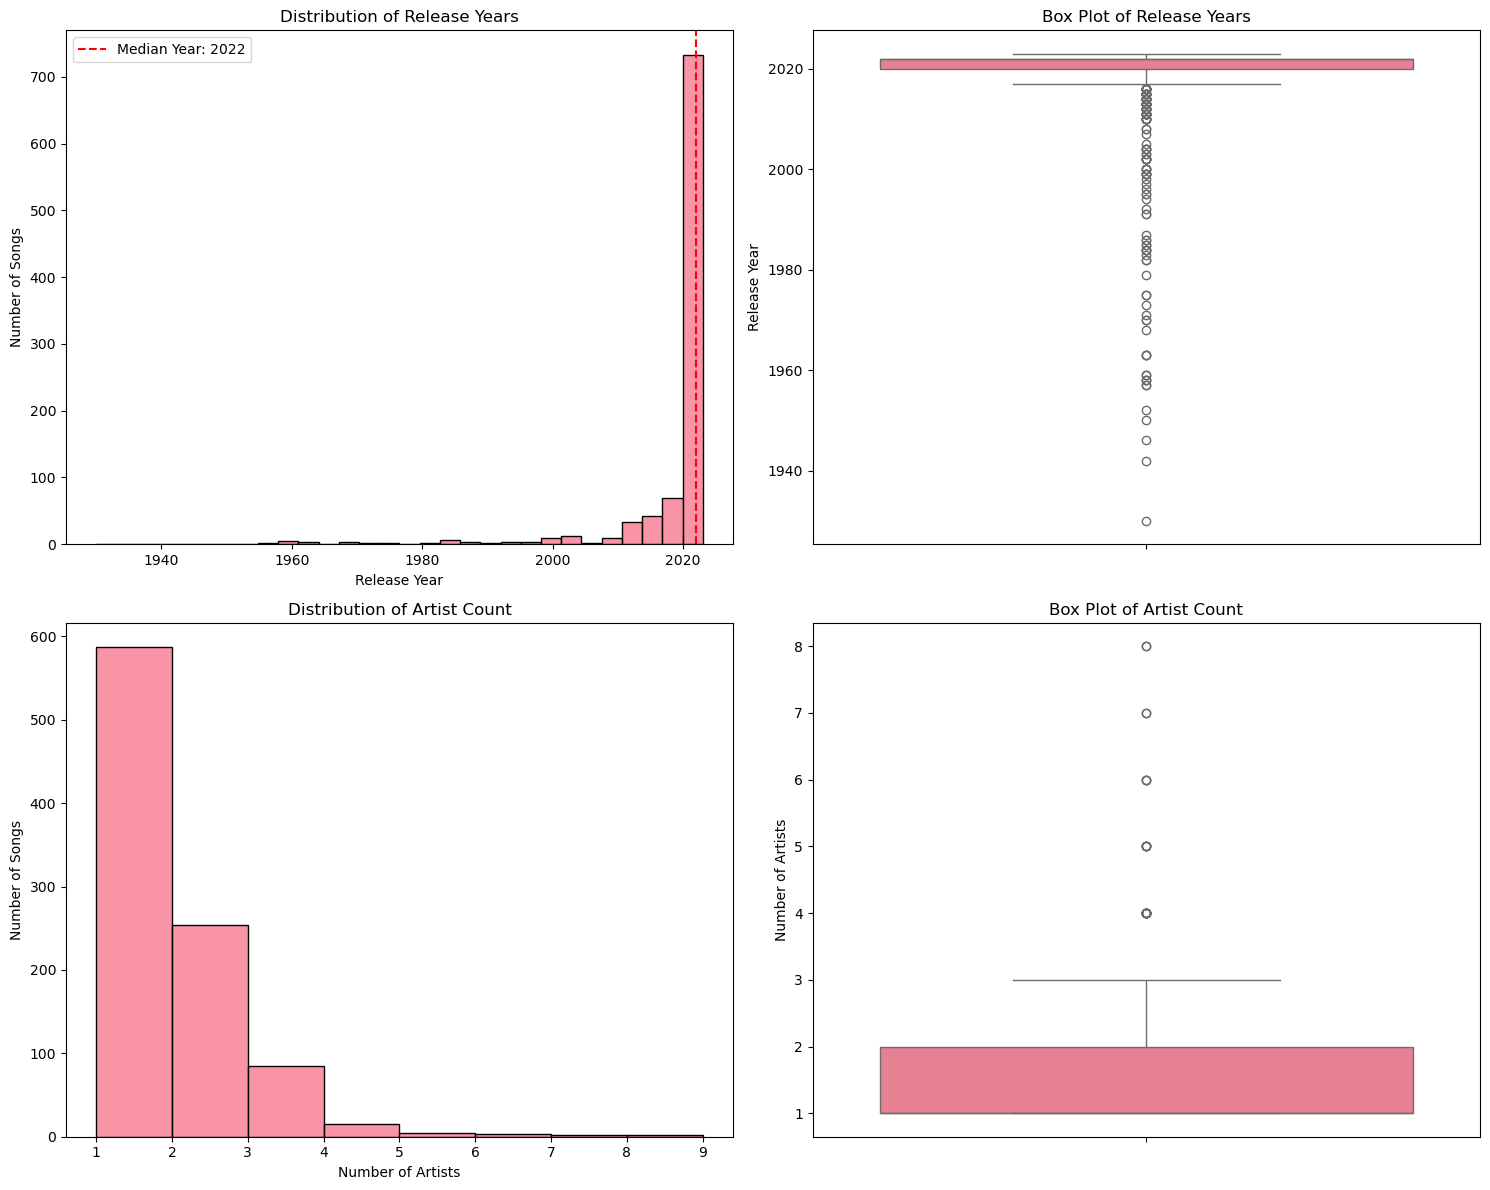

In [10]:
# Get the statistics of the streams column
print("\n=== Streams Statistics ===")
print(df['streams'].describe())

# Set up the plotting style
plt.style.use('seaborn-v0_8-bright')
sns.set_palette("husl")
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of released_year
sns.histplot(data=df, x='released_year', bins=30, ax=ax1)
ax1.set_title('Distribution of Release Years')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Number of Songs')

# Add vertical line for median year
median_year = df['released_year'].median()
ax1.axvline(x=median_year, color='red', linestyle='--', label=f'Median Year: {median_year:.0f}')
ax1.legend()

#Box plot for released_year to show outliers
sns.boxplot(data=df, y='released_year', ax=ax2)
ax2.set_title('Box Plot of Release Years')
ax2.set_ylabel('Release Year')

# Distribution of artist_count
sns.histplot(data=df, x='artist_count', bins=range(1, df['artist_count'].max() + 2), ax=ax3)
ax3.set_title('Distribution of Artist Count')
ax3.set_xlabel('Number of Artists')
ax3.set_ylabel('Number of Songs')

# Box plot for artist_count to show outliers
sns.boxplot(data=df, y='artist_count', ax=ax4)
ax4.set_title('Box Plot of Artist Count')
ax4.set_ylabel('Number of Artists')

plt.tight_layout()
plt.show()

# Top Performers
- Which track has the highest number of streams? Display the top 5 most streamed tracks.- 
Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [43]:
# Show top 5 most streamed songs
print("\n=== Top 5 Most Streamed Songs ===")
top_5_streams = df.nlargest(5, 'streams')[['track_name', 'artist(s)_name', 'streams']]
print(top_5_streams)




=== Top 5 Most Streamed Songs ===
                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

          streams  
55   3.703895e+09  
179  3.562544e+09  
86   2.887242e+09  
620  2.864792e+09  
41   2.808097e+09  


In [45]:
# Count the occurrences of each artist and get the top 5
top_artists_by_tracks = df['artist(s)_name'].value_counts().head(5)

# Display the result
print("Top 5 Artists by Track Count:")
print(top_artists_by_tracks)

Top 5 Artists by Track Count:
artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64


# Temporal Trends
- Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.- 
Does the number of tracks released per month follow any noticeable patterns? Which month sees the most releases?

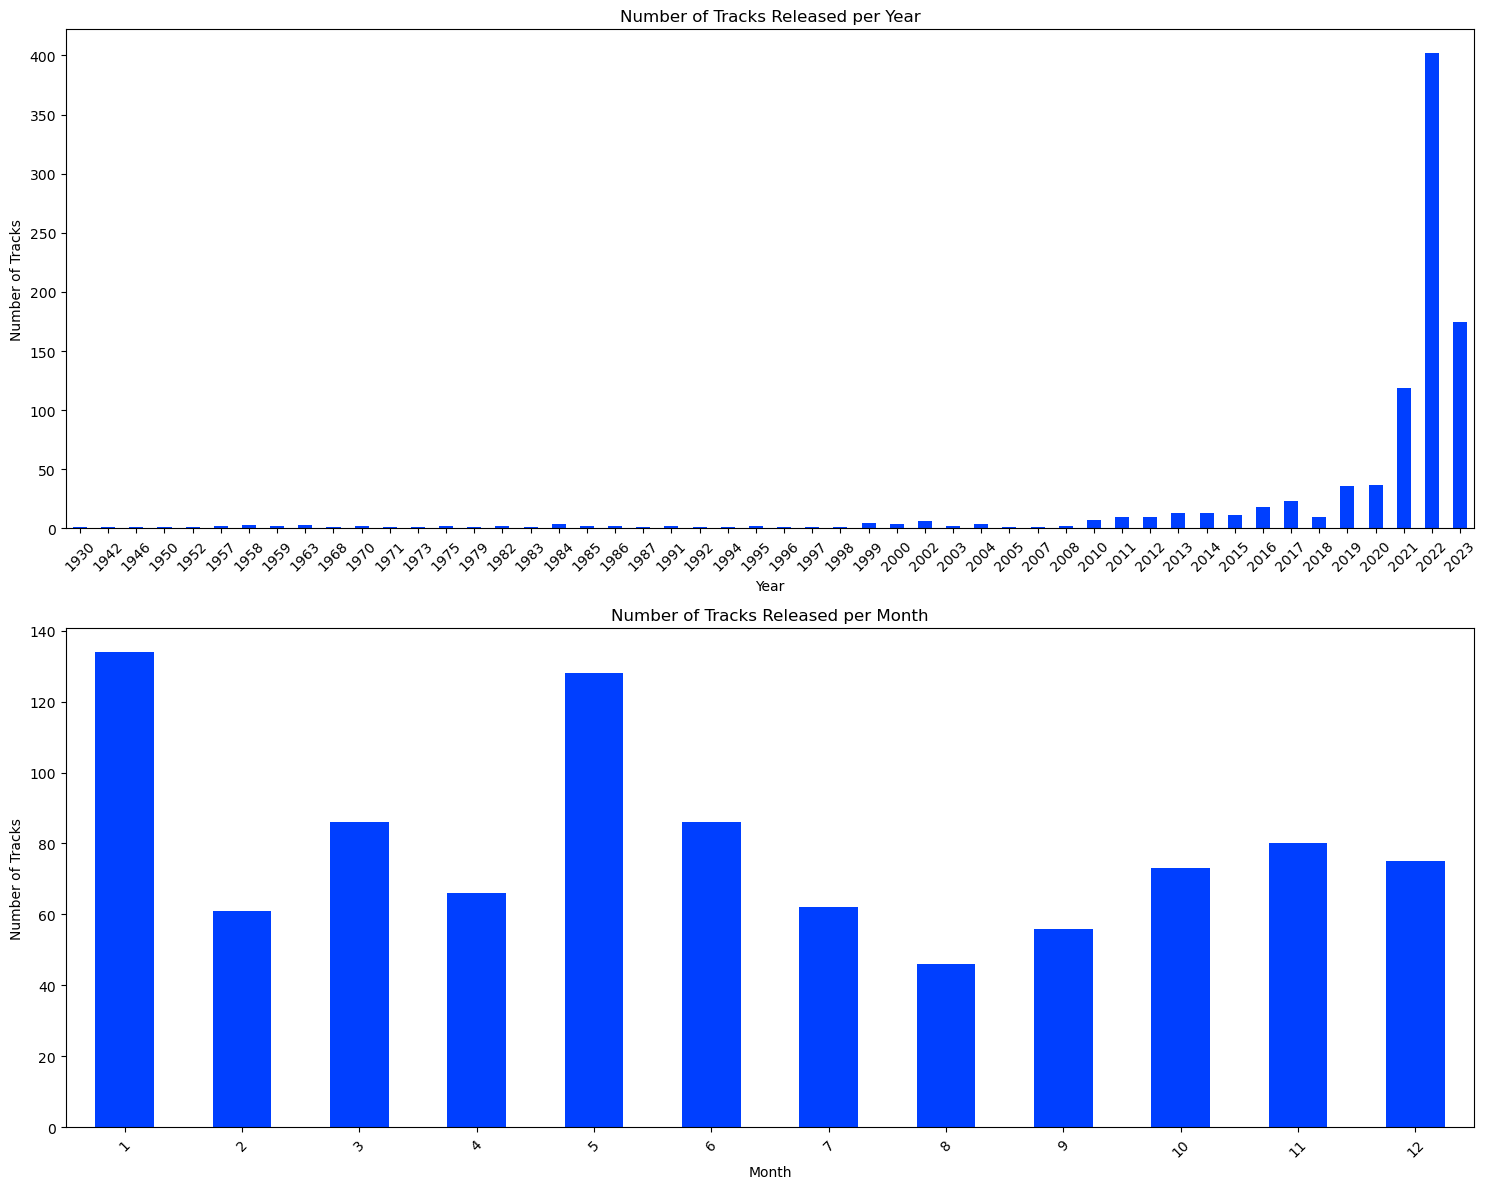


Yearly Release Counts:
Year 1930: 1 tracks
Year 1942: 1 tracks
Year 1946: 1 tracks
Year 1950: 1 tracks
Year 1952: 1 tracks
Year 1957: 2 tracks
Year 1958: 3 tracks
Year 1959: 2 tracks
Year 1963: 3 tracks
Year 1968: 1 tracks
Year 1970: 2 tracks
Year 1971: 1 tracks
Year 1973: 1 tracks
Year 1975: 2 tracks
Year 1979: 1 tracks
Year 1982: 2 tracks
Year 1983: 1 tracks
Year 1984: 4 tracks
Year 1985: 2 tracks
Year 1986: 2 tracks
Year 1987: 1 tracks
Year 1991: 2 tracks
Year 1992: 1 tracks
Year 1994: 1 tracks
Year 1995: 2 tracks
Year 1996: 1 tracks
Year 1997: 1 tracks
Year 1998: 1 tracks
Year 1999: 5 tracks
Year 2000: 4 tracks
Year 2002: 6 tracks
Year 2003: 2 tracks
Year 2004: 4 tracks
Year 2005: 1 tracks
Year 2007: 1 tracks
Year 2008: 2 tracks
Year 2010: 7 tracks
Year 2011: 10 tracks
Year 2012: 10 tracks
Year 2013: 13 tracks
Year 2014: 13 tracks
Year 2015: 11 tracks
Year 2016: 18 tracks
Year 2017: 23 tracks
Year 2018: 10 tracks
Year 2019: 36 tracks
Year 2020: 37 tracks
Year 2021: 119 tracks
Year

In [70]:
    def plot_temporal_trends(self, save_path: str = None):
        """Plot yearly and monthly release trends."""
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
        
        # Yearly trends
        year_counts = self.df['released_year'].value_counts().sort_index()
        year_counts.plot(kind='bar', ax=ax1)
        ax1.set_title('Number of Tracks Released per Year')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Number of Tracks')
        ax1.tick_params(axis='x', rotation=45)
        
        # Monthly trends
        month_counts = self.df['released_month'].value_counts().sort_index()
        month_counts.plot(kind='bar', ax=ax2)
        ax2.set_title('Number of Tracks Released per Month')
        ax2.set_xlabel('Month')
        ax2.set_ylabel('Number of Tracks')
        ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path)
        plt.show()
        
        return {
            'yearly_data': year_counts.to_dict(),
            'monthly_data': month_counts.to_dict()
        }

# Example usage:
    if __name__ == "__main__":
        analyzer = SpotifyTemporalAnalyzer('spotify-2023.csv')
        trends_data = analyzer.plot_temporal_trends()
        
        # Print the numerical data
        print("\nYearly Release Counts:")
        for year, count in trends_data['yearly_data'].items():
            print(f"Year {year}: {count} tracks")
        
        print("\nMonthly Release Counts:")
        for month, count in trends_data['monthly_data'].items():
            print(f"Month {month}: {count} tracks")

# Genre and Music Characteristics
- Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?- 
Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?

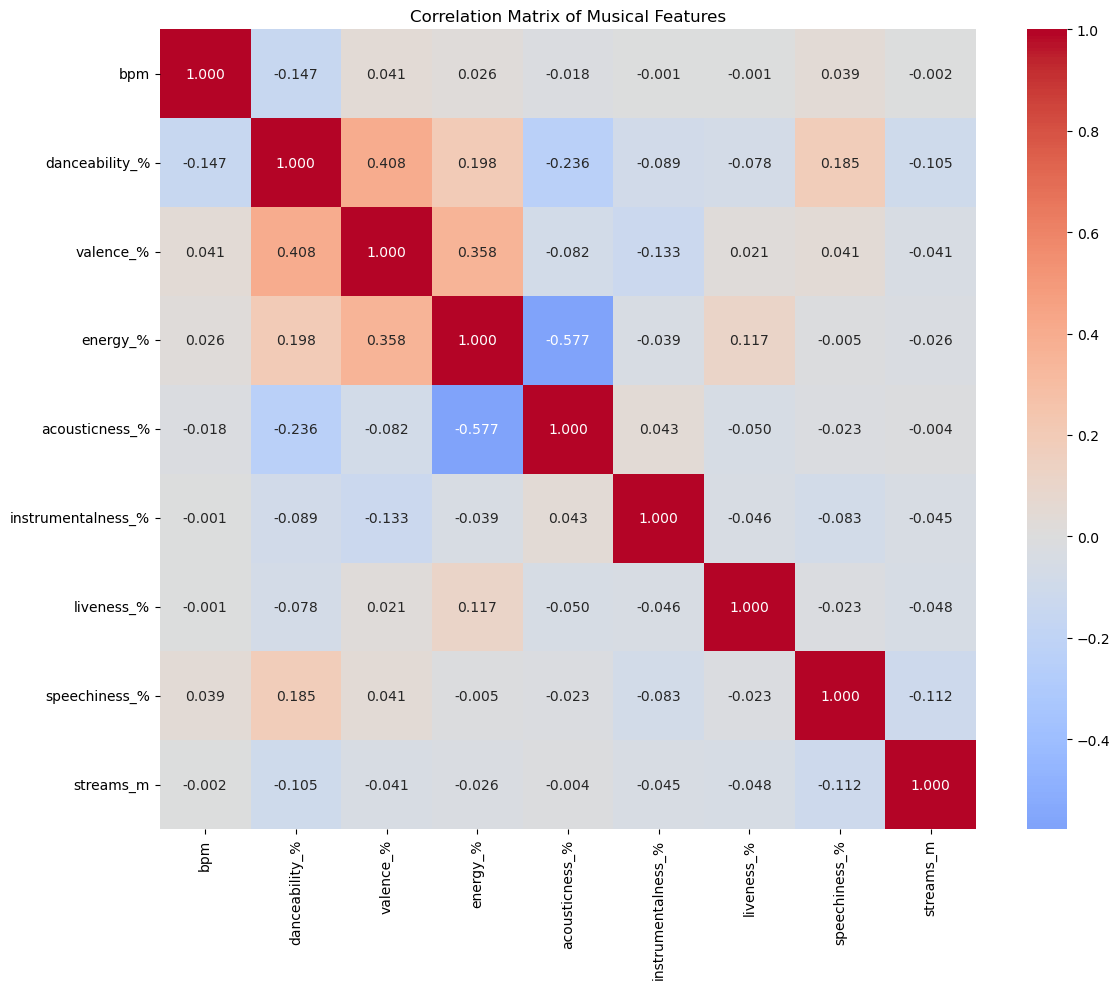

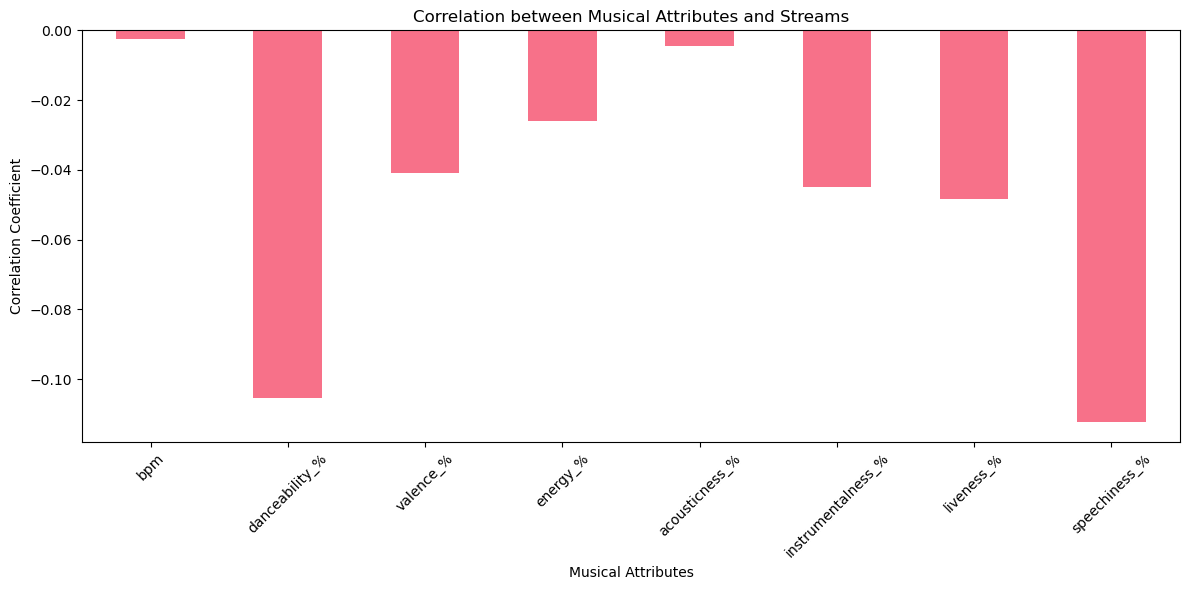

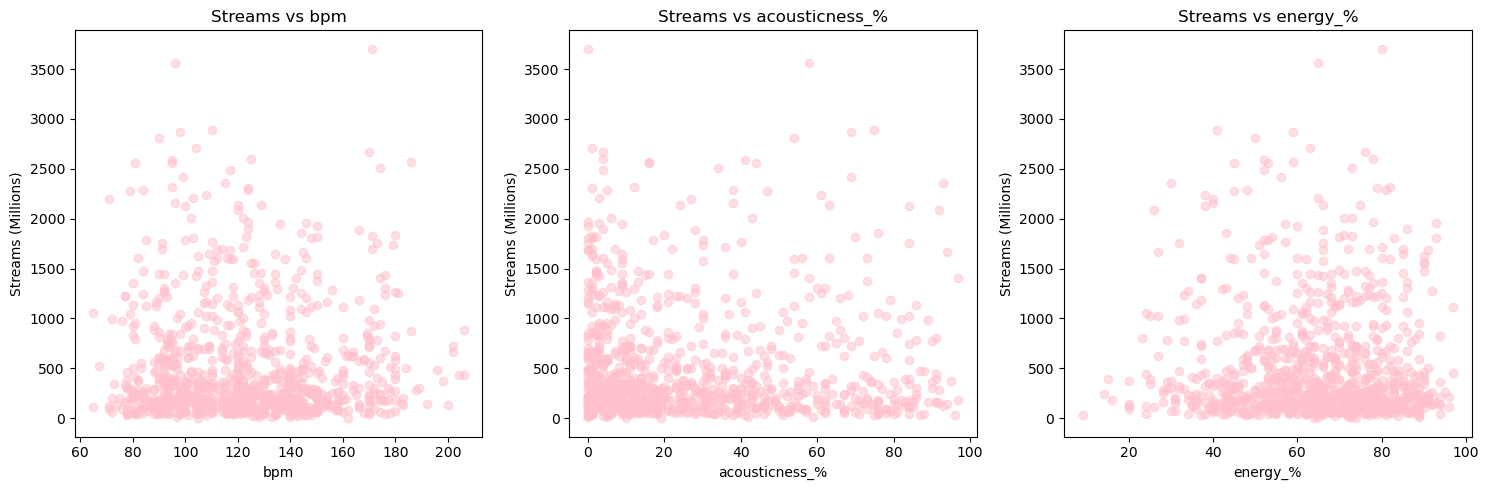


Correlations with streams:
streams_m             1.000000
bpm                  -0.002438
acousticness_%       -0.004485
energy_%             -0.026051
valence_%            -0.040831
instrumentalness_%   -0.044902
liveness_%           -0.048337
danceability_%       -0.105457
speechiness_%        -0.112333
Name: streams_m, dtype: float64


In [78]:
    
    def plot_correlation_analysis(self):
        """Plot correlation matrix and correlation analysis of musical features."""
        # Define musical features to analyze
        musical_features = [
            'bpm', 'danceability_%', 'valence_%', 'energy_%',
            'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
            'streams_m'
        ]
        
        # Calculate correlations
        correlation_matrix = self.df[musical_features].corr()
        
        # 1. Plot correlation matrix heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
        plt.title('Correlation Matrix of Musical Features')
        plt.tight_layout()
        plt.show()
        
        # 2. Plot correlation bar chart
        correlations = correlation_matrix['streams_m'].drop('streams_m')
        
        plt.figure(figsize=(12, 6))
        correlations.plot(kind='bar')
        plt.title('Correlation between Musical Attributes and Streams')
        plt.xlabel('Musical Attributes')
        plt.ylabel('Correlation Coefficient')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # 3. Create scatter plots for key features
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        features = ['bpm', 'acousticness_%', 'energy_%']
        
        for i, feature in enumerate(features):
            axes[i].scatter(self.df[feature], self.df['streams_m'], alpha=0.5, color='pink')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Streams (Millions)')
            axes[i].set_title(f'Streams vs {feature}')
        
        plt.tight_layout()
        plt.show()
        
        return correlation_matrix

# Example usage:
    if __name__ == "__main__":
        analyzer = SpotifyCorrelationAnalyzer('spotify-2023.csv')
        correlations = analyzer.plot_correlation_analysis()
        
        # Print numerical correlation values
        print("\nCorrelations with streams:")
        stream_correlations = correlations['streams_m'].sort_values(ascending=False)
        print(stream_correlations)

# Platform Popularity
- How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlists compare? Which platform seems to favor the most popular tracks?

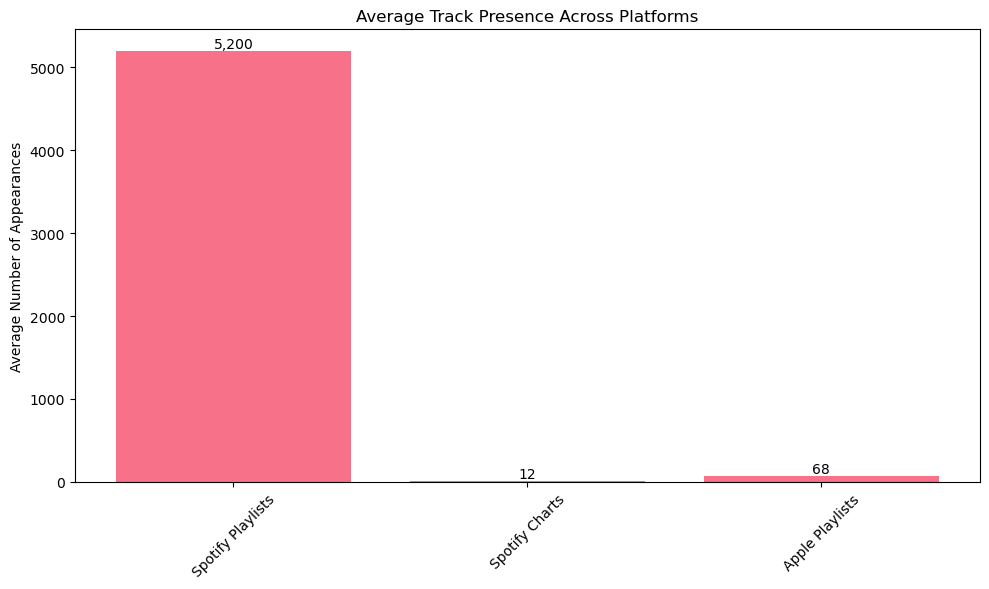


Platform Statistics:
       Spotify Playlists  Spotify Charts  Apple Playlists
count         953.000000      953.000000       953.000000
mean         5200.124869       12.009444        67.812172
std          7897.608990       19.575992        86.441493
min            31.000000        0.000000         0.000000
25%           875.000000        0.000000        13.000000
50%          2224.000000        3.000000        34.000000
75%          5542.000000       16.000000        88.000000
max         52898.000000      147.000000       672.000000


In [89]:

    def analyze_platforms(self):
        """Compare average presence across Spotify and Apple platforms."""
        # Calculate mean values for each platform
        platform_means = self.df[self.platform_cols].mean().round(2)
        
        # Create visualization
        plt.figure(figsize=(10, 6))
        
        # Create bar plot
        bars = plt.bar(range(len(platform_means)), platform_means.values)
        plt.title('Average Track Presence Across Platforms')
        plt.ylabel('Average Number of Appearances')
        plt.xticks(range(len(platform_means)), 
                  ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists'],
                  rotation=45)
        
        # Add value labels on top of each bar
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:,.0f}',
                    ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Calculate additional statistics for comparison
        platform_stats = self.df[self.platform_cols].describe()
        platform_stats.columns = ['Spotify Playlists', 'Spotify Charts', 'Apple Playlists']
        
        return platform_stats

    if __name__ == "__main__":
        analyzer = SpotifyAnalyzer('spotify-2023.csv')
        stats = analyzer.analyze_platforms()
        print("\nPlatform Statistics:")
        print(stats)

# Advanced Analysis
- Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?- 
Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.ts.

Available columns: ['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

=== KEY AND MODE STREAMING PATTERNS ===

Mode Statistics:
      streams                                          in_spotify_playlists  \
        count          mean       median           std                 mean   
mode                                                                          
Major     549  5.348328e+08  302006641.0  5.780509e+08              5530.31   
Minor     403  4.859445e+08  273005485.0  5.507029e+08              4749.49   

      in_spotify_charts  
                   mean  
mode                     
Major             11.40  
Minor             12.84  


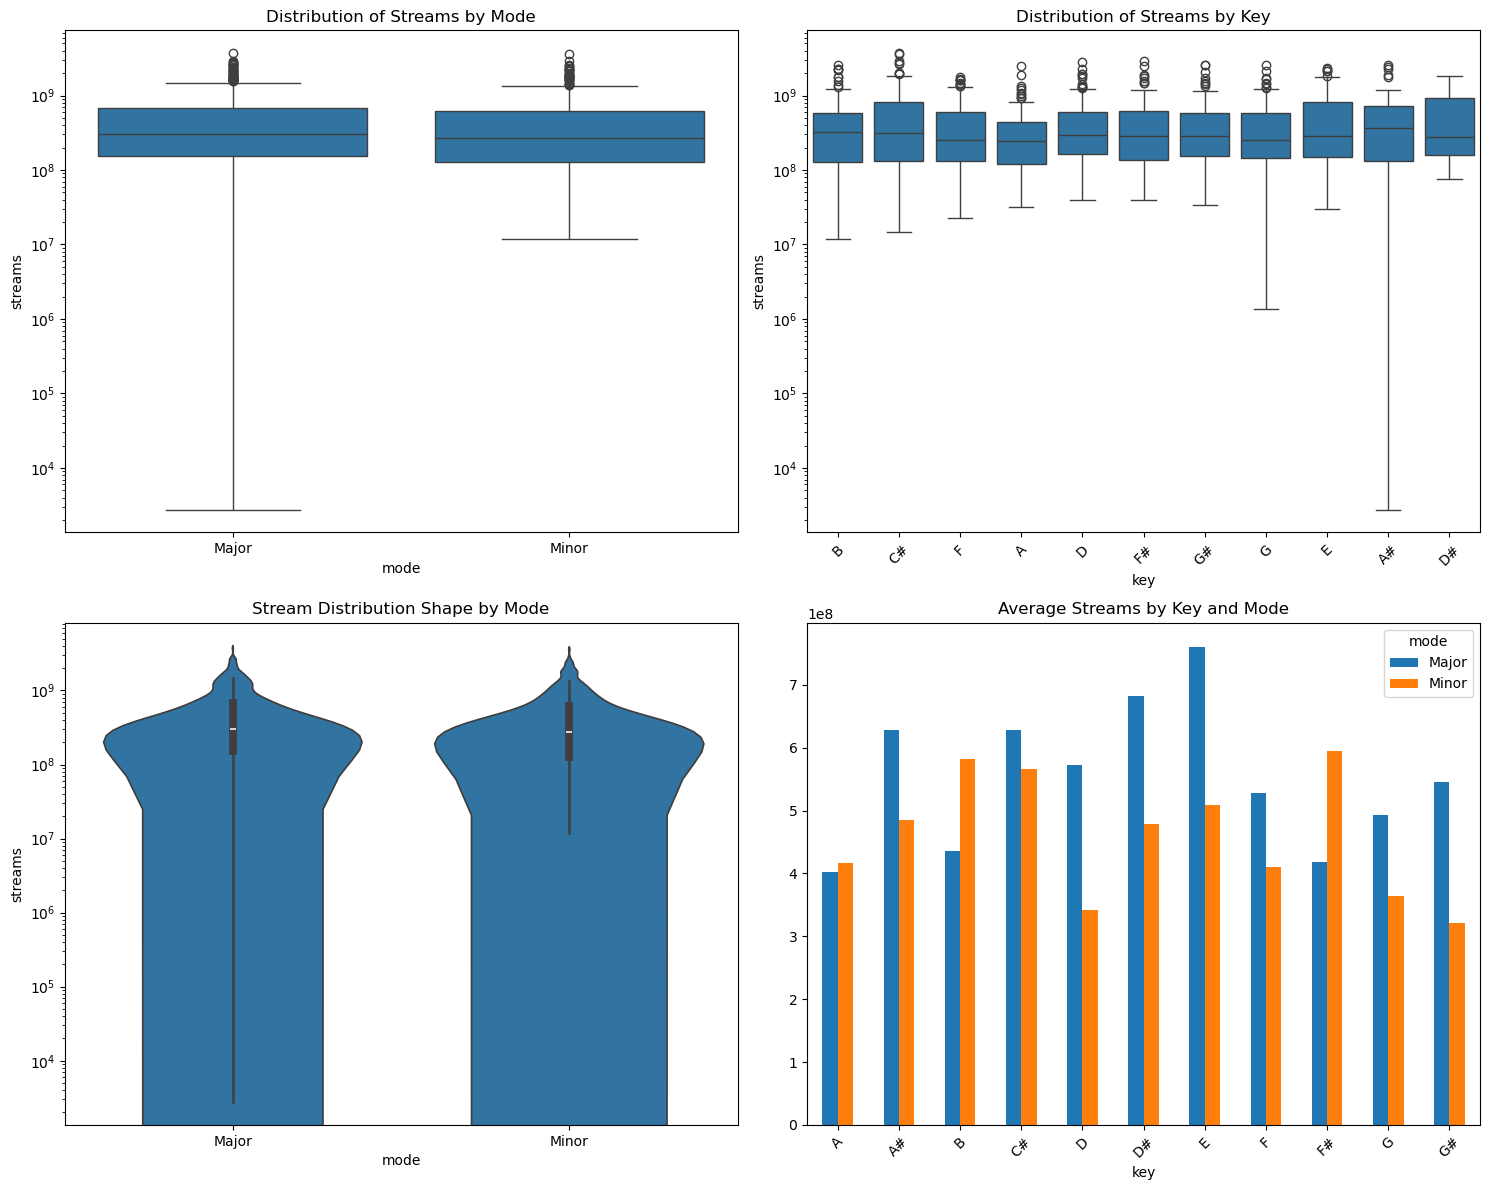

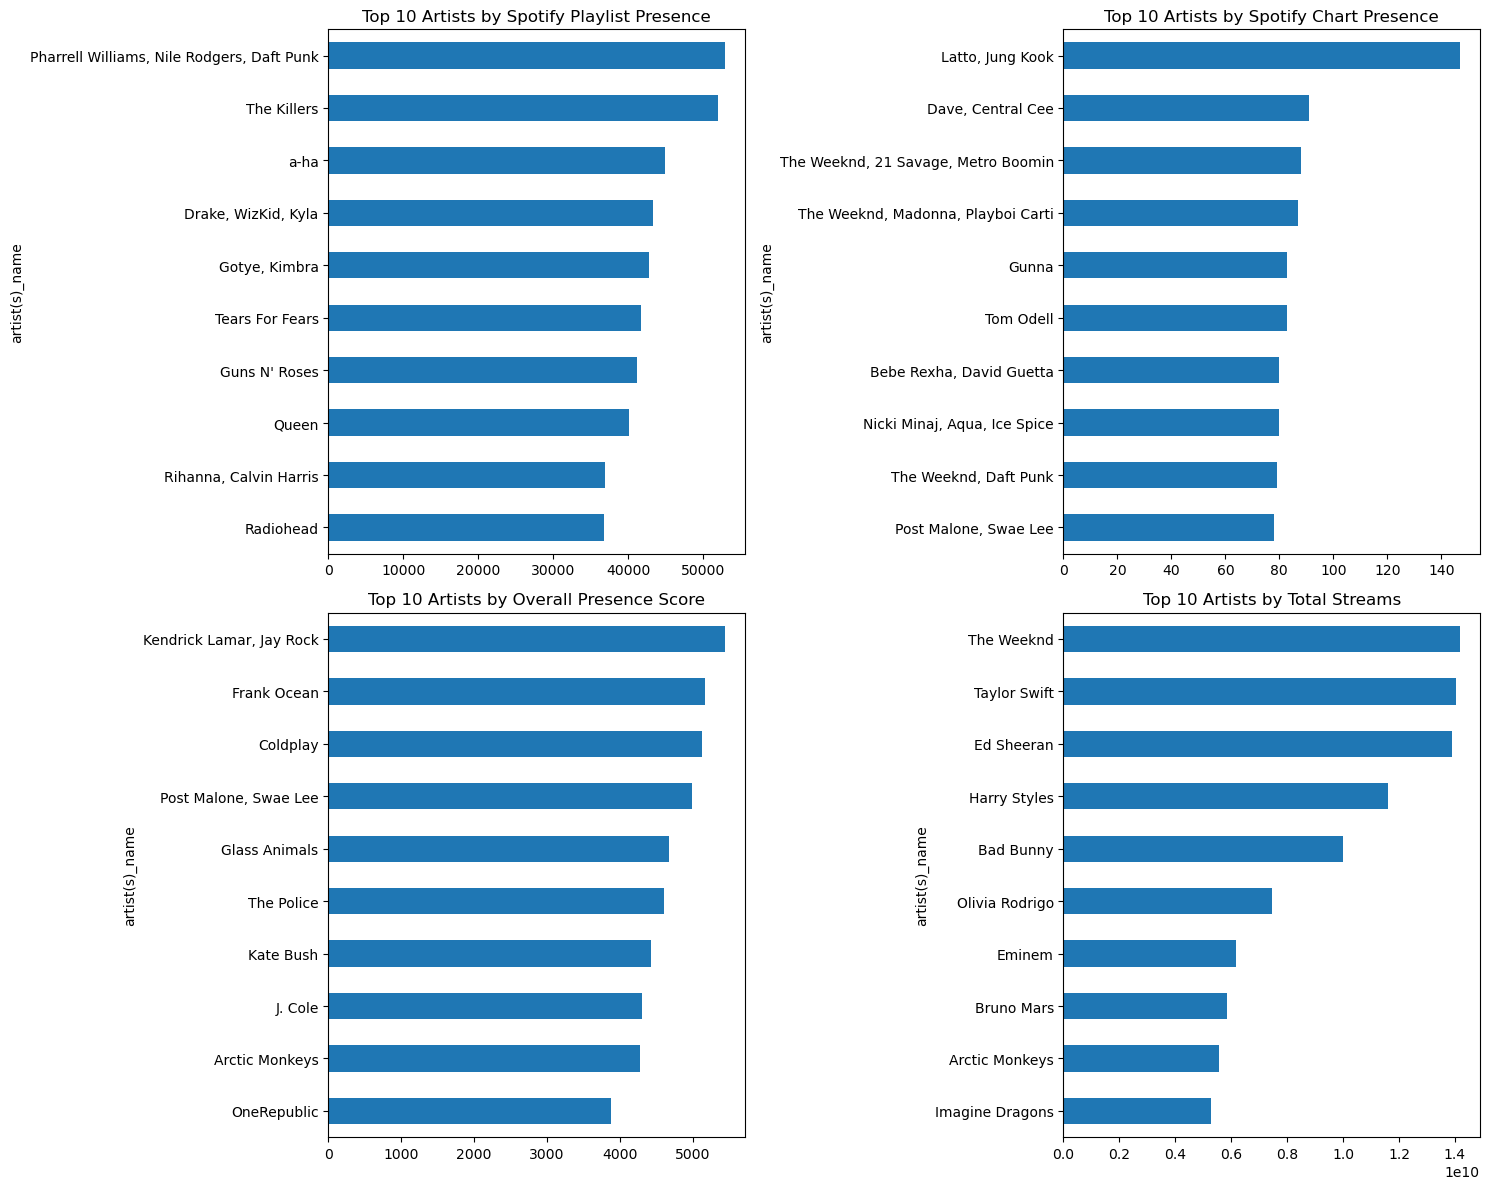

In [30]:
# For better documentation
def analyze_spotify_patterns(df):
    """
    Analyzes Spotify 2023 data focusing on:
    1. Stream patterns by key and mode
    2. Artist and genre presence in playlists/charts
    """
    
    def preprocess_data(df):
        """Preprocess the dataframe to ensure correct data types"""
        # Convert streams and playlist/chart columns to numeric
        df['streams'] = pd.to_numeric(df['streams'].astype(str).str.replace(',', ''), errors='coerce')
        
        playlist_chart_cols = [
            'in_spotify_playlists', 'in_spotify_charts', 
            'in_apple_playlists', 'in_apple_charts',
            'in_deezer_playlists', 'in_deezer_charts'
        ]
        
        for col in playlist_chart_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            
        return df
    
    def analyze_key_mode_patterns():
        """Analyze streaming patterns based on key and mode"""
        # Streaming analysis by mode
        mode_stats = df.groupby('mode').agg({
            'streams': ['count', 'mean', 'median', 'std'],
            'in_spotify_playlists': 'mean',
            'in_spotify_charts': 'mean'
        }).round(2)
        
        # Streaming analysis by key
        key_stats = df.groupby('key').agg({
            'streams': ['count', 'mean', 'median', 'std'],
            'in_spotify_playlists': 'mean',
            'in_spotify_charts': 'mean'
        }).round(2)
        
        # Perform t-test between Major and Minor modes
        major_streams = df[df['mode'] == 'Major']['streams'].dropna()
        minor_streams = df[df['mode'] == 'Minor']['streams'].dropna()
        mode_ttest = stats.ttest_ind(major_streams, minor_streams)
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Box plot of streams by mode
        sns.boxplot(data=df, x='mode', y='streams', ax=axes[0, 0])
        axes[0, 0].set_title('Distribution of Streams by Mode')
        axes[0, 0].set_yscale('log')  # Use log scale for better visualization
        
        # 2. Box plot of streams by key
        sns.boxplot(data=df, x='key', y='streams', ax=axes[0, 1])
        axes[0, 1].set_title('Distribution of Streams by Key')
        axes[0, 1].set_yscale('log')
        axes[0, 1].tick_params(axis='x', rotation=45)
        
        # 3. Violin plot of streams by mode
        sns.violinplot(data=df, x='mode', y='streams', ax=axes[1, 0])
        axes[1, 0].set_title('Stream Distribution Shape by Mode')
        axes[1, 0].set_yscale('log')
        
        # 4. Average streams by key and mode
        avg_by_key_mode = df.pivot_table(
            values='streams', 
            index='key', 
            columns='mode', 
            aggfunc='mean'
        ).fillna(0)
        avg_by_key_mode.plot(kind='bar', ax=axes[1, 1])
        axes[1, 1].set_title('Average Streams by Key and Mode')
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        
        return {
            'mode_stats': mode_stats,
            'key_stats': key_stats,
            'mode_ttest': mode_ttest,
            'visualization': plt
        }
    
    def analyze_artist_genre_presence():
        """Analyze artist and genre presence in playlists and charts"""
        # Calculate total playlist and chart presence for each artist
        artist_presence = df.groupby('artist(s)_name').agg({
            'streams': 'sum',
            'in_spotify_playlists': 'mean',
            'in_spotify_charts': 'mean',
            'in_apple_playlists': 'mean',
            'in_apple_charts': 'mean',
            'in_deezer_playlists': 'mean',
            'in_deezer_charts': 'mean'
        }).round(2)
        
        # Calculate a presence score (weighted average of playlist and chart presence)
        artist_presence['total_presence_score'] = (
            artist_presence['in_spotify_playlists'] * 0.2 +
            artist_presence['in_spotify_charts'] * 0.3 +
            artist_presence['in_apple_playlists'] * 0.2 +
            artist_presence['in_apple_charts'] * 0.2 +
            artist_presence['in_deezer_playlists'] * 0.05 +
            artist_presence['in_deezer_charts'] * 0.05
        )
        
        # Analyze genre presence (using 'tracks_genre' column)
        if 'tracks_genre' in df.columns:
            genre_presence = df.groupby('tracks_genre').agg({
                'streams': 'sum',
                'in_spotify_playlists': 'mean',
                'in_spotify_charts': 'mean',
                'in_apple_playlists': 'mean',
                'in_apple_charts': 'mean'
            }).round(2)
        else:
            genre_presence = pd.DataFrame()  # Empty DataFrame if column doesn't exist
        
        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # 1. Top 10 artists by playlist presence
        top_10_playlist = artist_presence.nlargest(10, 'in_spotify_playlists')
        top_10_playlist['in_spotify_playlists'].plot(
            kind='barh', ax=axes[0, 0], title='Top 10 Artists by Spotify Playlist Presence'
        )
        axes[0, 0].invert_yaxis()  # Better visualization with artist names
        
        # 2. Top 10 artists by chart presence
        top_10_charts = artist_presence.nlargest(10, 'in_spotify_charts')
        top_10_charts['in_spotify_charts'].plot(
            kind='barh', ax=axes[0, 1], title='Top 10 Artists by Spotify Chart Presence'
        )
        axes[0, 1].invert_yaxis()
        
        # 3 & 4. Genre plots (only if genre data exists)
        if not genre_presence.empty:
            # Top 10 genres by playlist presence
            top_10_genre_playlist = genre_presence.nlargest(10, 'in_spotify_playlists')
            top_10_genre_playlist['in_spotify_playlists'].plot(
                kind='barh', ax=axes[1, 0], title='Top 10 Genres by Spotify Playlist Presence'
            )
            axes[1, 0].invert_yaxis()
            
            # Top 10 genres by chart presence
            top_10_genre_charts = genre_presence.nlargest(10, 'in_spotify_charts')
            top_10_genre_charts['in_spotify_charts'].plot(
                kind='barh', ax=axes[1, 1], title='Top 10 Genres by Spotify Chart Presence'
            )
            axes[1, 1].invert_yaxis()
        else:
            # Alternative plots if genre data isn't available
            # Top artists by total presence score
            artist_presence.nlargest(10, 'total_presence_score')['total_presence_score'].plot(
                kind='barh', ax=axes[1, 0], title='Top 10 Artists by Overall Presence Score'
            )
            axes[1, 0].invert_yaxis()
            
            # Top artists by streams
            artist_presence.nlargest(10, 'streams')['streams'].plot(
                kind='barh', ax=axes[1, 1], title='Top 10 Artists by Total Streams'
            )
            axes[1, 1].invert_yaxis()
        
        plt.tight_layout()
        
        return {
            'artist_presence': artist_presence.sort_values('total_presence_score', ascending=False),
            'genre_presence': genre_presence if not genre_presence.empty else None,
            'top_artists_playlists': top_10_playlist,
            'top_artists_charts': top_10_charts,
            'visualization': plt
        }
    
    # Preprocess the data
    df = preprocess_data(df)
    
    # Perform analyses
    results = {
        'key_mode_patterns': analyze_key_mode_patterns(),
        'presence_patterns': analyze_artist_genre_presence()
    }
    
    return results

# Example usage:
if __name__ == "__main__":
    # Read the dataset
    df = pd.read_csv('spotify-2023.csv')
    
    # Print available columns (helpful for debugging)
    print("Available columns:", df.columns.tolist())
    
    # Perform analysis
    results = analyze_spotify_patterns(df)
    
    # Print key findings
    print("\n=== KEY AND MODE STREAMING PATTERNS ===")
    print("\nMode Statistics:")
    print(results['key_mode_patterns']['mode_stats'])
    print("\nMode T-Test Results:")
    print(f"t-statistic: {results['key_mode_patterns']['mode_ttest'].statistic:.2f}")
    print(f"p-value: {results['key_mode_patterns']['mode_ttest'].pvalue:.4f}")
    
    print("\n=== TOP ARTISTS BY PRESENCE ===")
    print("\nTop 10 Artists by Overall Presence:")
    print(results['presence_patterns']['artist_presence'].head(10)[['total_presence_score', 'streams']])
    
    # Display visualizations
    results['key_mode_patterns']['visualization'].show()
    results['presence_patterns']['visualization'].show()